<a href="https://colab.research.google.com/github/Darshini-A/Data-Science-2/blob/main/Prac_4_DSII_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q.4 Predict acceptability of a car. Use Classification Models. Use the data set car.data

In [1]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset directly from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
df = pd.read_csv(url, names=column_names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
pd.DataFrame(df.info()).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


""


In [4]:
pd.DataFrame(df.describe()).T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
acceptability,1728,4,unacc,1210


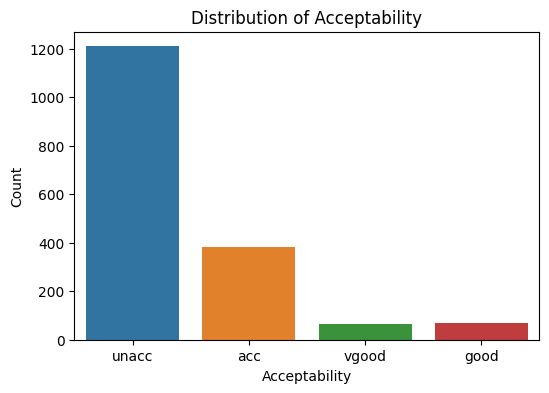

In [5]:
# Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='acceptability', data=df)
plt.title('Distribution of Acceptability')
plt.xlabel('Acceptability')
plt.ylabel('Count')
plt.show()

In [6]:
# Preprocessing and Feature Engineering
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

# Assign features to X and the target variable to y
X = df_encoded.drop('acceptability', axis=1)
y = df_encoded['acceptability']

# Encode the target variable if it's not already encoded
le = LabelEncoder()
y = le.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection
# Using SelectKBest to select the top k features based on ANOVA F-statistic
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Choose a classification model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make predictions on the testing set
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.69        83
           1       0.18      0.18      0.18        11
           2       0.92      0.95      0.94       235
           3       0.71      0.59      0.65        17

    accuracy                           0.84       346
   macro avg       0.63      0.60      0.61       346
weighted avg       0.84      0.84      0.84       346

Accuracy: 0.8410404624277457
